In [1]:
# Ensure compatibility
from __future__ import absolute_import, division, print_function

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import TensorFlow and Keras packages
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


In [2]:
from google.colab import files


# Importing the dataset
uploaded = files.upload()  # Allows to upload files to Google Colab

import io
filename = list(uploaded.keys())[0]  # Gets the filename of the uploaded file
data1 = pd.read_csv(io.BytesIO(uploaded[filename]))  # Reads the uploaded file into a DataFrame

Saving joined_data.csv to joined_data.csv


In [3]:
data1.head()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
0,6653,7/30/12,1970,Married,0,PhD,55158,1,1,0.332539,1,0
1,6181,7/31/12,1950,Not Married,21,2n Cycle,52203,0,0,0.314147,0,0
2,4692,8/1/12,1976,Married,0,Graduation,7500,1,0,0.035913,1,0
3,2611,8/1/12,1959,Not Married,55,Master,82576,0,0,0.503190,0,1
4,10001,8/1/12,1985,Not Married,17,2n Cycle,7500,1,0,0.035913,0,0


In [4]:
data1.tail()

,transaction_ID,transaction_date,Year_Birth,Marital_Status,MntFruits,Education,Income,children_categorical,teen_categorical,income_standardize,maritalstat_categorical,spender_class
2210,1371,6/28/14,1976,Not Married,164,Graduation,79941,0,0,0.486789,0,1
2211,6722,6/28/14,1954,Married,28,PhD,70421,0,1,0.427536,1,1
2212,8093,6/28/14,1969,Married,8,Master,79734,0,0,0.485501,1,0
2213,7300,6/29/14,1952,Not Married,4,Graduation,69142,0,1,0.419576,0,0
2214,453,6/29/14,1956,Not Married,0,PhD,35340,1,1,0.209190,0,0


In [5]:
data1nparray = data1.values

In [6]:
# Define independent variables

TrainData   = data1nparray[:, [7, 8, 9, 10]]
# Define dependent variable

TrainLabels = data1nparray[:, [11]]

In [7]:
TrainDataFloat = TrainData.astype(float)

In [8]:
TrainDataFloat

array([[1.        , 1.        , 0.33253873, 1.        ],
       [0.        , 0.        , 0.31414665, 0.        ],
       [1.        , 0.        , 0.03591279, 1.        ],
       ...,
       [0.        , 0.        , 0.48550107, 1.        ],
       [0.        , 1.        , 0.41957589, 0.        ],
       [1.        , 1.        , 0.20919044, 0.        ]])

In [9]:
TrainLabelsInt = TrainLabels.astype(int)

In [10]:
TrainLabelsInt

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [11]:
model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [12]:
model.compile(
              optimizer='adam',
#             optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(TrainDataFloat, TrainLabelsInt, epochs=20)

Epoch 1/20
70/70 [==============================] - 1s 3ms/step - loss: 0.6384 - accuracy: 0.6388
Epoch 2/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5358 - accuracy: 0.7133
Epoch 3/20
70/70 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7133
Epoch 4/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7490
Epoch 5/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7783
Epoch 6/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4660 - accuracy: 0.7874
Epoch 7/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.7887
Epoch 8/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7896
Epoch 9/20
70/70 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7905
Epoch 10/20
70/70 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7887
Epoch 11/20
70/70 [

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define various configurations
activation_functions = ['relu', 'softmax', 'sigmoid', 'tanh']
epochs_list = [15, 20, 25, 30]
layers_configurations = {
    2: [16, 2],
    3: [32, 16, 2],
    4: [32, 16, 8, 2],
    5: [64, 32, 16, 8, 2]
}
optimizer_algorithms = ['adam', 'rmsprop', 'sgd', 'adagrad']
loss_functions = ['sparse_categorical_crossentropy']

# Store best model performance
best_accuracy = 0
best_configuration = {}

# Iterate over each combination of configurations
for activation in activation_functions:
    for epochs in epochs_list:
        for num_layers, nodes_configuration in layers_configurations.items():
            for optimizer in optimizer_algorithms:
                for loss in loss_functions:
                    # Build the model
                    model = keras.Sequential()
                    # Add layers based on the configuration
                    for nodes in nodes_configuration[:-1]:
                        model.add(keras.layers.Dense(nodes, activation=activation))
                    # Add output layer
                    model.add(keras.layers.Dense(nodes_configuration[-1], activation='softmax'))

                    # Compile the model
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Fit the model with a validation split
                    history = model.fit(TrainDataFloat, TrainLabelsInt, epochs=epochs, validation_split=0.2, verbose=0)

                    # Check if the current model has better validation accuracy
                    val_accuracy = max(history.history['val_accuracy'])
                    if val_accuracy > best_accuracy:
                        best_accuracy = val_accuracy
                        best_configuration = {
                            'activation': activation,
                            'epochs': epochs,
                            'layers': num_layers,
                            'nodes': nodes_configuration,
                            'optimizer': optimizer,
                            'loss': loss,
                            'validation_accuracy': val_accuracy
                        }

# Print the best model configuration and its accuracy
print(f"Best Validation Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)

Best Validation Accuracy: 0.8916478753089905
Best Configuration: {'activation': 'relu', 'epochs': 15, 'layers': 4, 'nodes': [32, 16, 8, 2], 'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'validation_accuracy': 0.8916478753089905}


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Define various configurations
activation_functions = ['relu', 'softmax', 'sigmoid', 'tanh']
epochs_list = [15, 20, 25, 30]
layers_list = [2, 3, 4]
nodes_per_layer = 16  # Example node count, adjust as needed
optimizer_algorithms = ['adam', 'rmsprop']
loss_functions = ['sparse_categorical_crossentropy']

# Store best model performance
best_accuracy = 0
best_configuration = {}

# Iterate over each combination of configurations
for activation in activation_functions:
    for epochs in epochs_list:
        for num_layers in layers_list:
            for optimizer in optimizer_algorithms:
                for loss in loss_functions:
                    # Build the model
                    model = keras.Sequential()
                    # Add hidden layers
                    for _ in range(num_layers - 1):
                        model.add(keras.layers.Dense(nodes_per_layer, activation=activation))
                    # Output layer
                    model.add(keras.layers.Dense(2, activation='softmax'))  # Adjust the number of output nodes as necessary

                    # Compile the model
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Fit the model with a validation split
                    history = model.fit(TrainDataFloat, TrainLabelsInt, epochs=epochs, validation_split=0.2, verbose=0)

                    # Check if the current model has better validation accuracy
                    val_accuracy = max(history.history['val_accuracy'])
                    if val_accuracy > best_accuracy:
                        best_accuracy = val_accuracy
                        best_configuration = {
                            'activation': activation,
                            'epochs': epochs,
                            'layers': num_layers,
                            'nodes': nodes_per_layer,
                            'optimizer': optimizer,
                            'loss': loss,
                            'validation_accuracy': val_accuracy
                        }

# Print the best model configuration and its accuracy
print(f"Best Validation Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)


Epoch 1/15
70/70 [==============================] - 1s 6ms/step - loss: 0.5927 - accuracy: 0.6885
Epoch 2/15
70/70 [==============================] - 1s 7ms/step - loss: 0.5137 - accuracy: 0.7124
Epoch 3/15
70/70 [==============================] - 1s 7ms/step - loss: 0.4879 - accuracy: 0.7684
Epoch 4/15
70/70 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7865
Epoch 5/15
70/70 [==============================] - 0s 3ms/step - loss: 0.4666 - accuracy: 0.7847
Epoch 6/15
70/70 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.7842
Epoch 7/15
70/70 [==============================] - 0s 5ms/step - loss: 0.4573 - accuracy: 0.7833
Epoch 8/15
70/70 [==============================] - 1s 8ms/step - loss: 0.4532 - accuracy: 0.7856
Epoch 9/15
70/70 [==============================] - 1s 8ms/step - loss: 0.4494 - accuracy: 0.7878
Epoch 10/15
70/70 [==============================] - 0s 5ms/step - loss: 0.4443 - accuracy: 0.7869
Epoch 11/15
70/70 [

In [ ]:
history = model.fit(TrainDataFloat, TrainLabelsInt, epochs=epochs, validation_split=0.2, verbose=0)

# Store best model performance
best_accuracy = 0
best_configuration = {}

# Check if the current model has better validation accuracy
val_accuracy = max(history.history['val_accuracy'])
if val_accuracy > best_accuracy:
  best_accuracy = val_accuracy
  best_configuration = {
        'activation': activation,
        'epochs': epochs,
        'layers': num_layers,
       'nodes': nodes_per_layer,
         'optimizer': optimizer,
        'loss': loss,
        'validation_accuracy': val_accuracy
                        }

# Print the best model configuration and its accuracy
print(f"Best Validation Accuracy: {best_accuracy}")
print("Best Configuration:", best_configuration)

Best Validation Accuracy: 0.8735891580581665
Best Configuration: {'activation': 'tanh', 'epochs': 30, 'layers': 4, 'nodes': 32, 'optimizer': 'rmsprop', 'loss': 'sparse_categorical_crossentropy', 'validation_accuracy': 0.8735891580581665}


In [15]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)


70/70 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.7133
Train accuracy: 0.7133182883262634


In [16]:
predictions = model.predict(TrainDataFloat)


70/70 [==============================] - 0s 1ms/step


In [17]:
class_names = ['lowspender', 'highspender']


In [18]:
print(len(predictions[0]))
print(len(class_names))

2
2


In [19]:
def plot_image(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label[i][0]:
    TextColor = 'blue'
  else:
    TextColor = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(
                                  class_names[predicted_label],
                                  100*np.max(predictions_array[i]),
                                  class_names[true_label[i][0]]
                                  ),
                                color=TextColor)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(True)
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array[i])
  thisplot = plt.bar(range(len(predictions_array[0])), predictions_array[i], color="#777777")

  # if the true label equals the predicted label, then the blue color will overwrite the red color
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i][0]].set_color('blue')


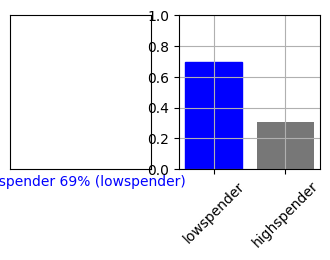

In [20]:
i = 0
# width, height
plt.figure(figsize=(4,2))

# nrows, ncols, index
plt.subplot(1,2,1)
# Create summary plot on left side
plot_image(i, predictions, TrainLabelsInt)
# nrows, ncols, index
plt.subplot(1,2,2)
# Create bar plot on right side
plot_value_array(i, predictions, TrainLabelsInt)
# Label X axis with classification names
plt.xticks(range(len(predictions[0])), class_names, rotation=45)
# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [21]:
predictions[0]


array([0.69487286, 0.3051271 ], dtype=float32)

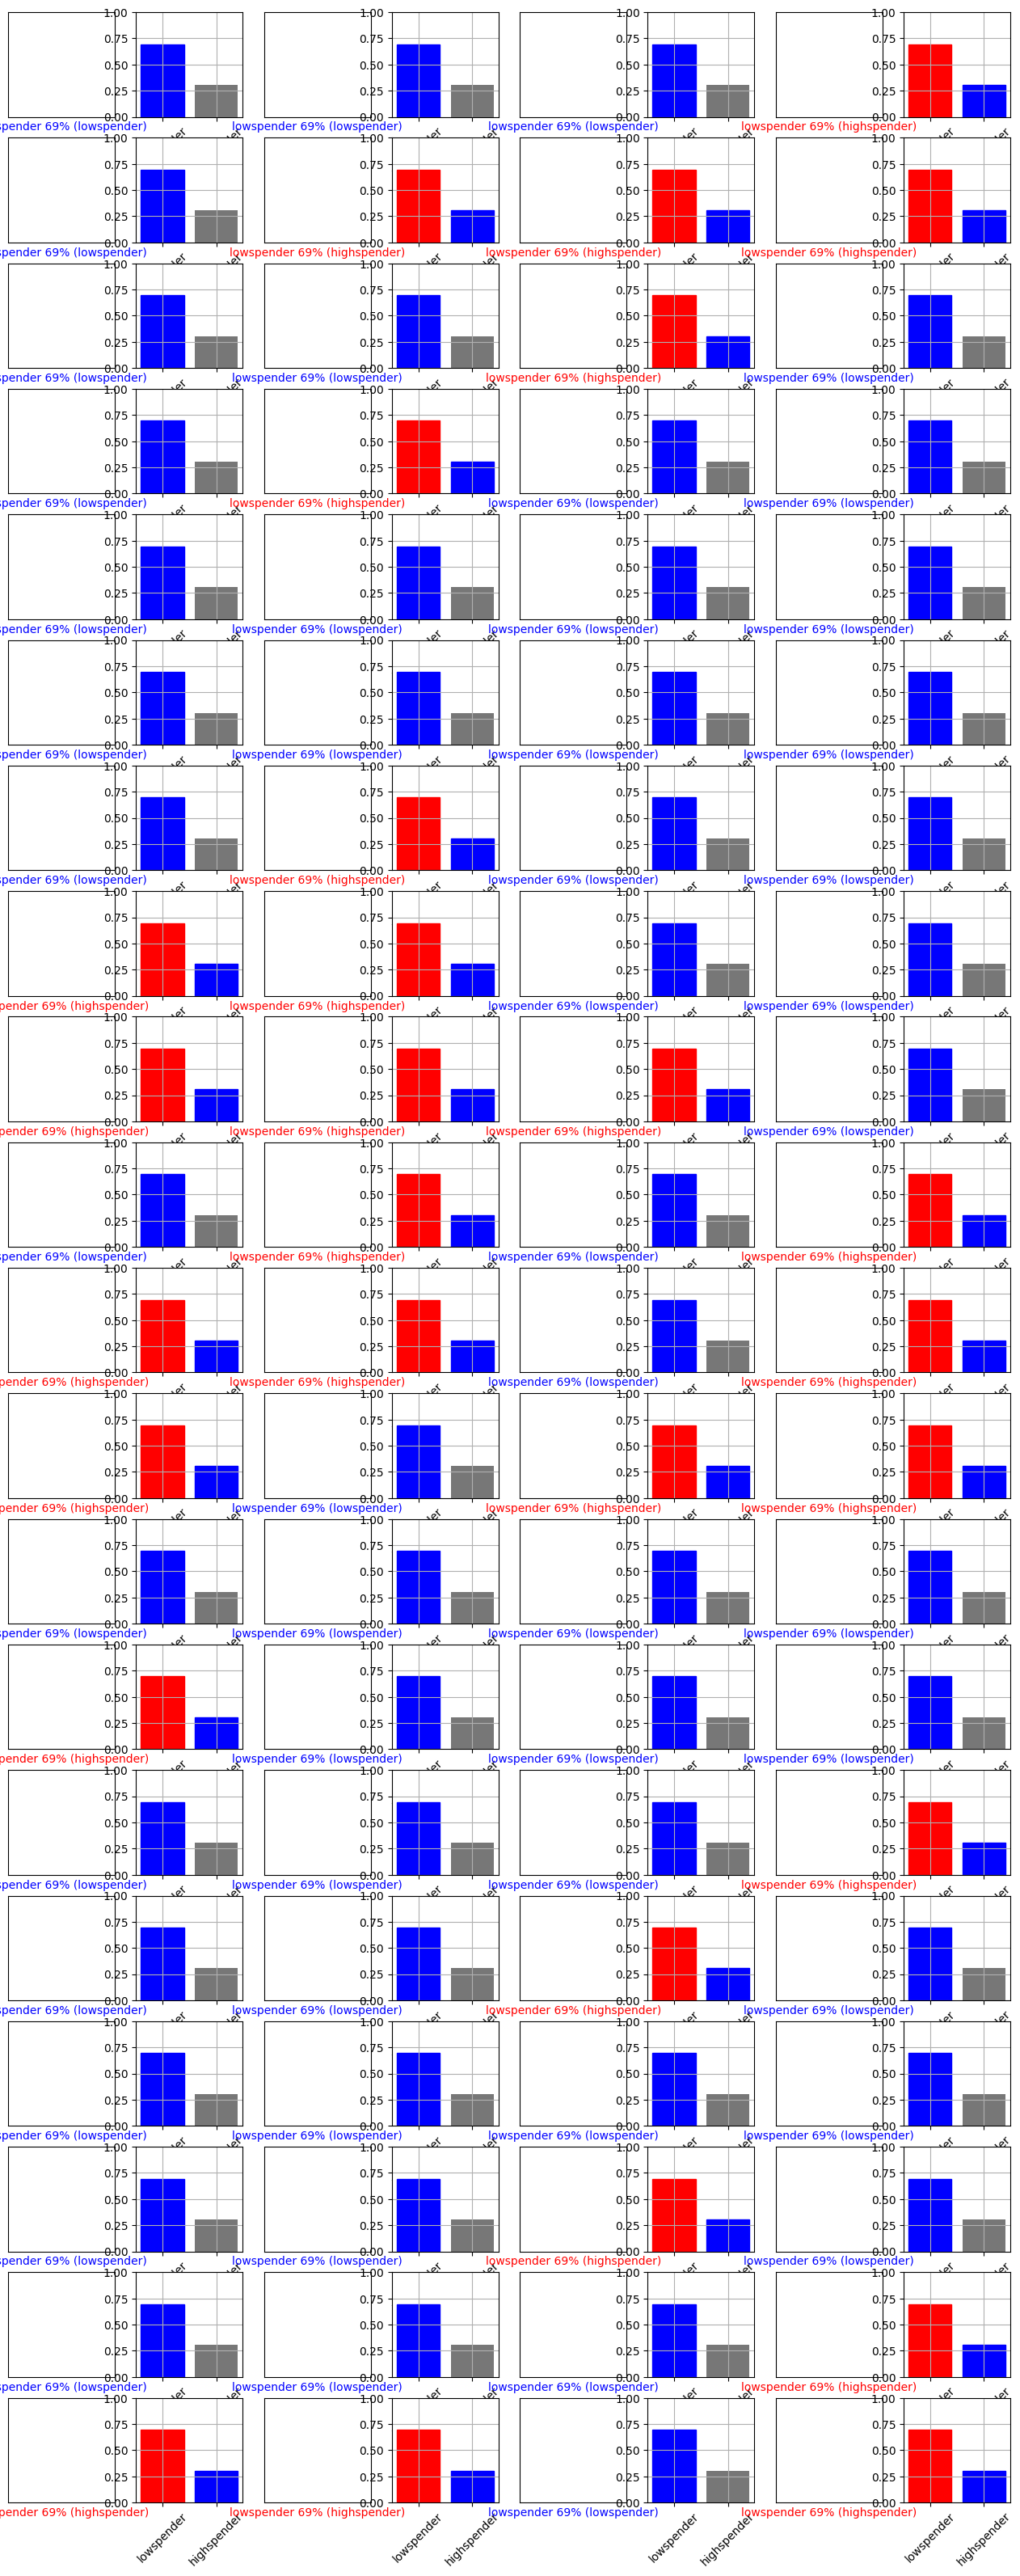

In [22]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
# width, height
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Create each plot
for i in range(num_images):
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Create summary plot on left side
  plot_image(i, predictions, TrainLabelsInt)
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Create bar plot on right side
  plot_value_array(i, predictions, TrainLabelsInt)
  # Label X axis with classification names
  plt.xticks(range(len(predictions[0])), class_names, rotation=45)

# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [23]:
layer0 = model.get_layer(index=0)


In [24]:
layer0.get_weights()

[array([[ 3.22283179e-01,  3.80394101e-01,  2.85221368e-01,
         -2.32083693e-01,  2.85269141e-01,  2.90470809e-01,
          1.57799125e-01, -4.01521206e-01,  3.22574288e-01,
          3.86728853e-01,  2.77658910e-01,  3.73318881e-01,
         -1.66777577e-02,  2.81313568e-01,  1.19646370e-01,
         -1.91331044e-01, -1.23992860e-01,  2.78759390e-01,
          3.02348167e-01,  1.81676090e-01, -2.82488108e-01,
          1.20993890e-01, -2.50087529e-01,  3.73025596e-01,
         -5.65981232e-02,  7.98859354e-03,  1.89609990e-01,
          3.84754032e-01, -3.83657157e-01,  2.73312837e-01,
         -4.02126163e-01, -3.25246125e-01],
        [-6.74532279e-02, -3.20616007e-01, -2.89964944e-01,
          9.55996513e-02, -8.58762488e-02,  3.44215453e-01,
         -1.62099898e-01, -3.14359553e-04, -2.88883924e-01,
         -7.43091702e-02,  1.19485155e-01,  3.27506274e-01,
         -1.06746502e-01,  2.67873049e-01, -2.65163213e-01,
          1.18033864e-01,  7.82225430e-02,  1.13328472e-

In [25]:
layer1 = model.get_layer(index=1)

In [26]:
layer1.get_weights()

[array([[-0.05988447,  0.15993094,  0.02651739,  0.34965673,  0.01036055,
          0.34441856, -0.2502237 , -0.27663228,  0.09321543,  0.29901618,
          0.20368695,  0.2643626 ,  0.25729924,  0.06843416,  0.07619102,
         -0.07181763],
        [ 0.01918243, -0.33285528, -0.05153356,  0.14323376,  0.05129542,
          0.16208097,  0.26740298, -0.16762033,  0.15861826, -0.05268282,
          0.34958738, -0.24376884, -0.01665065, -0.24622816, -0.0753484 ,
         -0.17809   ],
        [-0.19170511,  0.03364758, -0.34193438, -0.24732971, -0.05318093,
         -0.1821042 ,  0.21452746,  0.23729615, -0.22492224,  0.28998002,
          0.2471764 , -0.02685772, -0.34234986, -0.00390306,  0.3011462 ,
          0.28616956],
        [-0.25983006,  0.06541263, -0.05105431,  0.26705208, -0.34087282,
         -0.24458082, -0.170357  , -0.27670965,  0.18381429, -0.3008265 ,
         -0.12484016, -0.33102477,  0.13542451, -0.06148744,  0.07216918,
         -0.28802958],
        [-0.04467949

In [27]:
layer2 = model.get_layer(index=2)

In [28]:
layer2.get_weights()

[array([[-0.1374736 ,  0.27135426, -0.09988215, -0.15869038, -0.2754494 ,
          0.03064314,  0.2923933 , -0.37684926],
        [-0.24586643, -0.39546162, -0.17609426,  0.27638617, -0.3699886 ,
         -0.49495566,  0.39121097, -0.16285366],
        [ 0.32219368, -0.08563973, -0.07178588, -0.2612234 , -0.27207124,
          0.03899829, -0.08361542,  0.3931871 ],
        [ 0.30518743, -0.06477479, -0.03831741, -0.34536684, -0.29441944,
         -0.49500325,  0.4099817 ,  0.14450726],
        [-0.11824308,  0.11904132,  0.42379805, -0.19158366,  0.2622061 ,
          0.19695814,  0.0974574 , -0.37350947],
        [-0.41076326,  0.12709244,  0.13028193, -0.26592755, -0.44363374,
         -0.18278626,  0.37749007, -0.13234372],
        [ 0.07863077, -0.10766013, -0.23658262, -0.45189473,  0.28770235,
          0.04826617,  0.21409218, -0.40357962],
        [ 0.3917287 ,  0.06527661, -0.12755568,  0.37327895, -0.32549024,
          0.26730654, -0.13869324,  0.06458634],
        [ 0.3335

In [29]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame(
    data=predictions,
    columns=class_names
    )


In [30]:
# Create external file that contains the predictions
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=True, index=False)


In [31]:
# Create one-dimensional array
TrainLabelsInt1D = np.ndarray.copy(TrainLabelsInt[:,0])

# Determine predicted outcomes and whether predicted outcomes equal actual outcomes
PredictedLabels1D   = np.ndarray.copy(TrainLabelsInt1D)
PredictedOutcomes1D = np.ndarray.copy(TrainLabelsInt1D)
for i in range(len(TrainLabelsInt1D)):
    PredictedLabels1D[i] = np.argmax(predictions[i])
    if PredictedLabels1D[i] == TrainLabelsInt1D[i]:
        PredictedOutcomes1D[i] = 1
    else:
        PredictedOutcomes1D[i] = 0

In [32]:
TrainLabelsInt1D

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
PredictedLabels1D

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
PredictedOutcomes1D

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
tf.math.confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
    )

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1580,    0],
       [ 635,    0]], dtype=int32)>

In [36]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
from sklearn.metrics import confusion_matrix

ClassificationMatrix = confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D
    )
print('Classification Matrix')
print(ClassificationMatrix)

Classification Matrix
[[1580    0]
 [ 635    0]]


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(TrainLabelsInt1D, PredictedLabels1D)))

Accuracy: 0.71


In [38]:
# Sensitivity is also called true positive rate (TPR) or recall
print('Sensitivity: {:.2f}'.format(recall_score(TrainLabelsInt1D, PredictedLabels1D, average='micro')))

Sensitivity: 0.71


In [39]:
# Create two-dimensional array
PredictedLabels2D      = np.ndarray.copy(TrainLabelsInt)
PredictedLabels2D[:,0] = np.ndarray.copy(PredictedLabels1D)

PredictedOutcomes2D      = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes2D[:,0] = np.ndarray.copy(PredictedOutcomes1D)

In [40]:
PredictedLabels1D

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
PredictedLabels2D

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [42]:
PredictedOutcomes1D

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
PredictedOutcomes2D

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [44]:
TrainDataLabels                        = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions             = np.append(TrainDataLabels, PredictedLabels2D, axis=1)
TrainDataLabelsPredictionsOutcomes     = np.append(TrainDataLabelsPredictions, PredictedOutcomes2D, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)

In [48]:
# Define header

HeaderNames = ['children','teen','income','marital', 'SpenderClassActual', 'SpenderClassPrediction', 'SpenderClassAccurate',
    'LowSpenderProbability', 'HighSpenderProbability']

# Create data frame
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb,
    columns=HeaderNames
    )

In [49]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=True, index=False)
# Updates made upto this point in the program for the new dataset

In [50]:
# Create directory to save model
!mkdir -p Models

In [ ]:
# Save model
tf.keras.models.save_model(
    model,
    "Models",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

In [ ]:
# Load saved model
new_model = tf.keras.models.load_model("Models")


In [ ]:
# Print summary of original model
model.summary()

In [ ]:
# Print summary of loaded model
new_model.summary()

In [ ]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.5, 0.5, 0.5,1]])
SingleObservationFloat = SingleObservation.astype(float)

SinglePrediction         = model.predict(SingleObservationFloat)
SinglePredictionNewModel = new_model.predict(SingleObservationFloat)

# Print prediction
print(SinglePrediction[0])
print(SinglePredictionNewModel[0])

In [ ]:
SinglePrediction[0]

In [ ]:
SinglePredictionNewModel[0]

In [ ]:
np.max(SinglePrediction[0])

In [ ]:
np.argmax(SinglePrediction[0])

In [ ]:
class_names[np.argmax(SinglePrediction[0])]

NameError: name 'SinglePrediction' is not defined

In [ ]:
!date

Tue Apr 23 04:18:04 AM UTC 2024
